In [1]:
import pandas as pd

df = pd.read_csv("Fish.csv")

In [2]:
df.drop(df[df["Weight"] == 0].index, inplace=True)
df["Length"] = (df["Length1"] + df["Length2"] + df["Length3"]) / 3
df["Volume"] = df["Length"] * df["Height"] * df["Width"]

df.drop(["Length1", "Length2", "Length3"], axis=1,inplace=True)

df.head()

,Species,Weight,Height,Width,Length,Volume
0,Bream,242.0,11.5200,4.0200,26.200000,1213.332480
1,Bream,290.0,12.4800,4.3056,27.166667,1459.770624
2,Bream,340.0,12.3778,4.6961,27.166667,1579.127335
3,Bream,363.0,12.7300,4.4555,29.600000,1678.868044
4,Bream,430.0,12.4440,5.1340,29.833333,1905.976964


In [3]:
df.shape

(158, 6)

In [4]:
x1 = df["Length"]
x2 = df["Height"]
x3 = df["Width"]
x4 = df["Volume"]

y = df["Weight"]

In [49]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (15,5)

# x1 Length

In [6]:
x1 = pd.DataFrame(x1)

m1 = LinearRegression()
m1.fit(x1, y)
print(f"""
Slope: {m1.coef_}
y intercept: {m1.intercept_}""")
p1 = m1.predict(x1)


Slope: [30.57609909]
y intercept: -476.0673127029776


Mathematically calculating the slope and y-intercept

In [7]:
df1 = df.copy()
df1 = df1[["Weight", "Length"]]
df1.rename(columns={'Weight': 'Weight (y)', 'Length': 'Length (x)'}, inplace=True)
df1["xy"] = df1["Weight (y)"] * df1["Length (x)"]
df1["x**2"] = df1["Length (x)"] * df1["Length (x)"]
df1.head()

,Weight (y),Length (x),xy,x**2
0,242.0,26.200000,6340.400000,686.440000
1,290.0,27.166667,7878.333333,738.027778
2,340.0,27.166667,9236.666667,738.027778
3,363.0,29.600000,10744.800000,876.160000
4,430.0,29.833333,12828.333333,890.027778


In [31]:
n = len(df1["Weight (y)"])

m = ((n * sum(df1["xy"])) - (sum(df1["Length (x)"]) * sum(df1["Weight (y)"]))) / ((n * sum(df1["x**2"])) - (sum(df1["Length (x)"]) * sum(df1["Length (x)"])))

b = ((sum(df1["Weight (y)"]) * sum(df1["x**2"])) - (sum(df1["Length (x)"]) * sum(df1["xy"]))) / ((n * sum(df1["x**2"])) - (sum(df1["Length (x)"]) * sum(df1["Length (x)"])))

print(f"""
Slope: {m}
y intercept: {b}""")


Slope: 30.576099087935674
y intercept: -476.06731270298576


In [32]:
df1["y_plots"] = (df1["Length (x)"] * m) + b

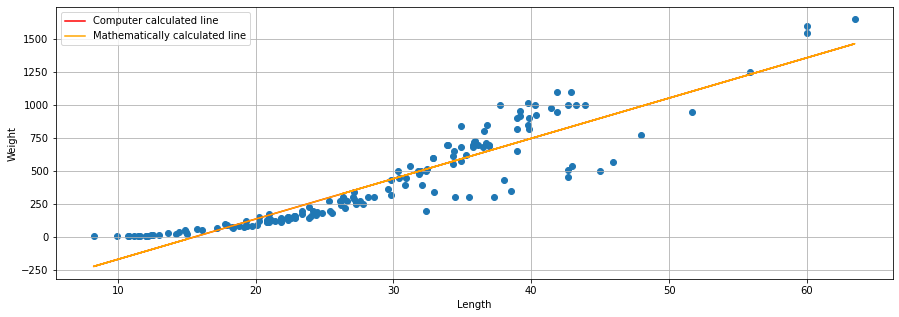

In [50]:
plt.scatter(x1, y)
plt.ylabel("Weight")
plt.xlabel("Length")
plt.plot(x1, p1, color="red", label="Computer calculated line")
plt.plot(df1["Length (x)"], df1["y_plots"] , color="orange", label="Mathematically calculated line")
plt.legend()
plt.grid()
plt.show()

# x2 Height

In [44]:
x2 = pd.DataFrame(x2)

m2 = LinearRegression()
m2.fit(x2, y)
print(f"""
Slope: {m2.coef_}
y intercept: {m2.intercept_}""")
p2 = m2.predict(x2)


Slope: [60.28187533]
y intercept: -140.89307841499794


Mathematically calculating the slope and y-intercept

In [45]:
df2 = df.copy()
df2 = df2[["Weight", "Height"]]
df2.rename(columns={'Weight': 'Weight (y)', 'Height': 'Height (x)'}, inplace=True)
df2["xy"] = df2["Weight (y)"] * df2["Height (x)"]
df2["x**2"] = df2["Height (x)"] * df2["Height (x)"]
df2.head()

,Weight (y),Height (x),xy,x**2
0,242.0,11.5200,2787.840,132.710400
1,290.0,12.4800,3619.200,155.750400
2,340.0,12.3778,4208.452,153.209933
3,363.0,12.7300,4620.990,162.052900
4,430.0,12.4440,5350.920,154.853136


In [46]:
n = len(df2["Weight (y)"])

m = ((n * sum(df2["xy"])) - (sum(df2["Height (x)"]) * sum(df2["Weight (y)"]))) / ((n * sum(df2["x**2"])) - (sum(df2["Height (x)"]) * sum(df2["Height (x)"])))

b = ((sum(df2["Weight (y)"]) * sum(df2["x**2"])) - (sum(df2["Height (x)"]) * sum(df2["xy"]))) / ((n * sum(df2["x**2"])) - (sum(df2["Height (x)"]) * sum(df2["Height (x)"])))

print(f"""
Slope: {m}
y intercept: {b}""")


Slope: 60.28187533035098
y intercept: -140.89307841499726


In [47]:
df2["y_plots"] = (df2["Height (x)"] * m) + b

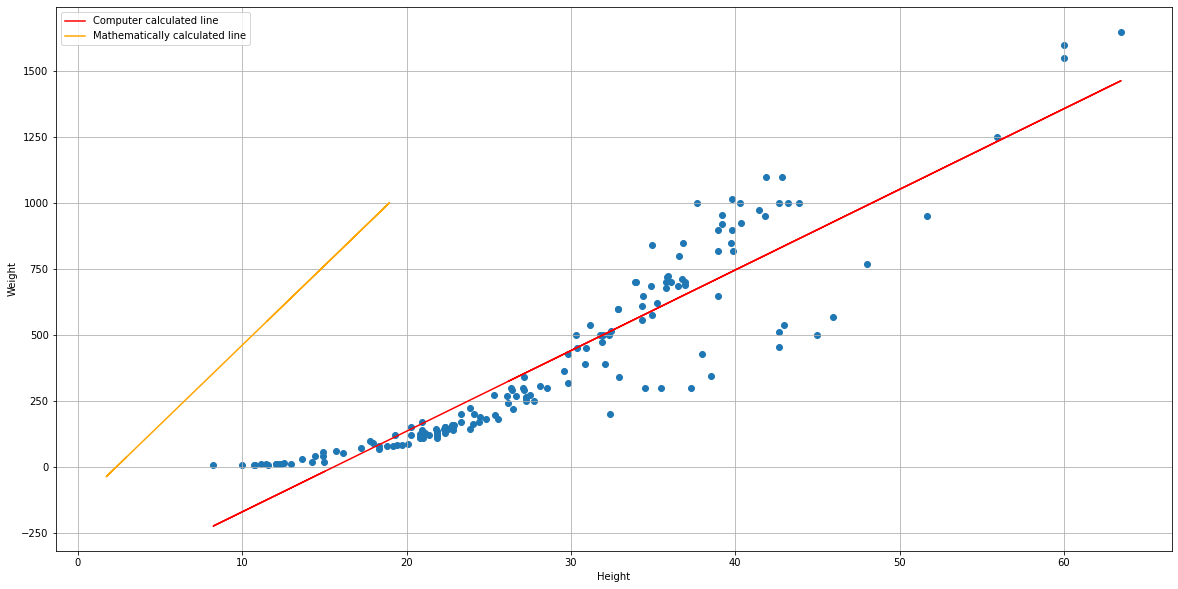

In [48]:
plt.scatter(x1, y)
plt.ylabel("Weight")
plt.xlabel("Height")
plt.plot(x1, p1, color="red", label="Computer calculated line")
plt.plot(df2["Height (x)"], df2["y_plots"] , color="orange", label="Mathematically calculated line")
plt.legend()
plt.grid()
plt.show()

In [41]:
len(df1["Weight (y)"])

158

# x3 Width

In [16]:
x3 = pd.DataFrame(x3)

m3 = LinearRegression()
m3.fit(x3, y)
print(f"""
Slope: {m3.coef_}
y intercept: {m3.intercept_}""")
p3 = m3.predict(x3)


Slope: [187.77514373]
y intercept: -429.9132647792899


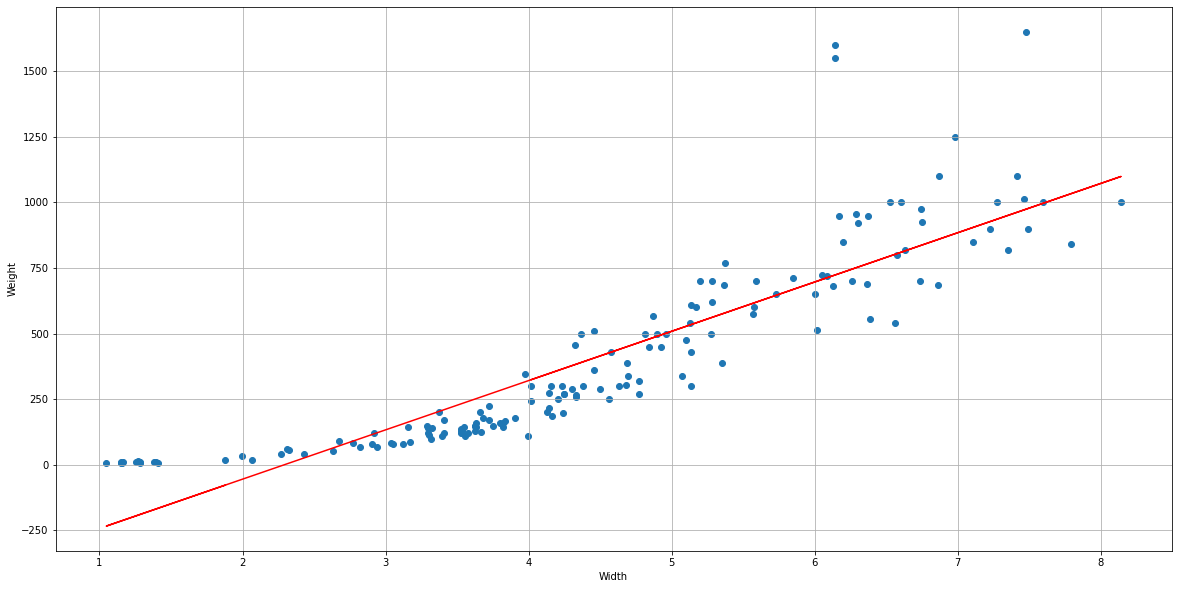

In [17]:
plt.scatter(x3, y)
plt.ylabel("Weight")
plt.xlabel("Width")
plt.plot(x3, p3, color="red")
plt.grid()
plt.show()

# x4 Volume

In [18]:
x4 = pd.DataFrame(x4)

m4 = LinearRegression()
m4.fit(x4, y)
print(f"""
Slope: {m4.coef_}
y intercept: {m4.intercept_}""")
p4 = m4.predict(x4)


Slope: [0.242401]
y intercept: 22.097125552699026


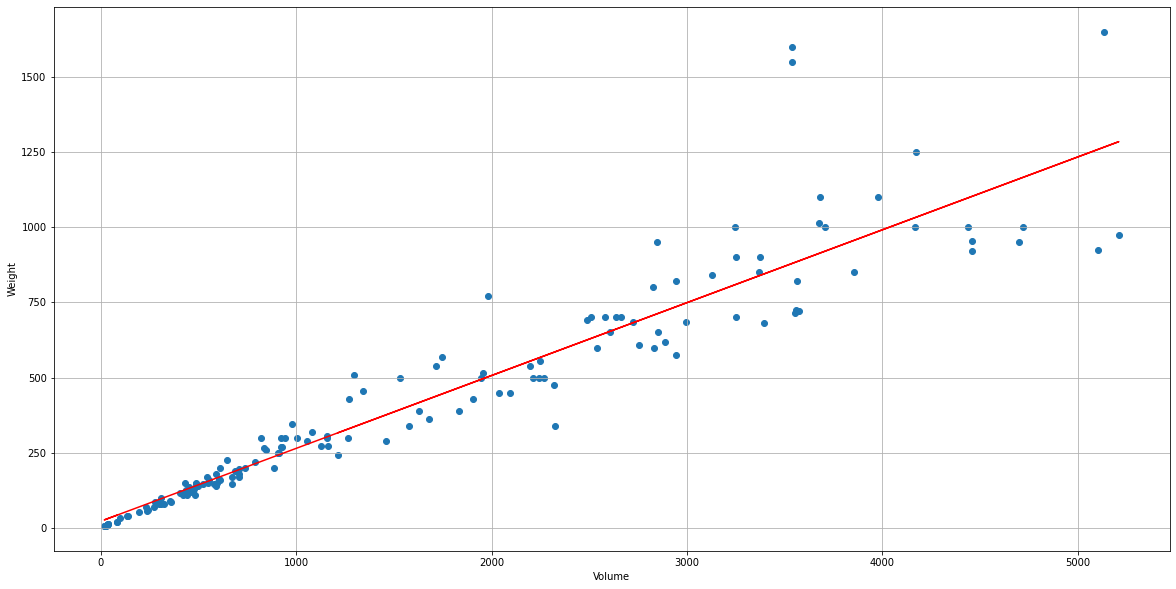

In [19]:
plt.scatter(x4, y)
plt.ylabel("Weight")
plt.xlabel("Volume")
plt.plot(x4, p4, color="red")
plt.grid()
plt.show()

# All features

In [20]:
x = df[["Length", "Height", "Width", "Volume"]]

m = LinearRegression()
m.fit(x, y)
print(f"""
Slope: {m.coef_}
y intercept: {m.intercept_}""")
p = m.predict(x)


Slope: [ 12.96845027 -22.22905676  -6.01250651   0.22430021]
y intercept: -95.1837630530934


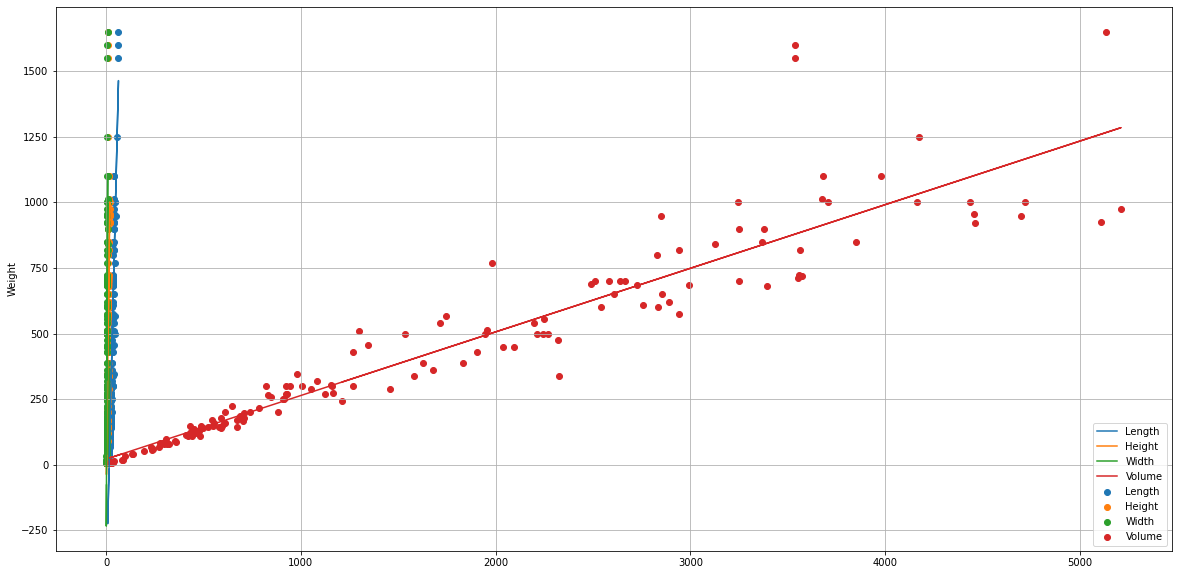

In [21]:
plt.scatter(x1, y, label="Length")
plt.scatter(x2, y, label="Height")
plt.scatter(x3, y, label="Width")
plt.scatter(x4, y, label="Volume")
plt.ylabel("Weight")
plt.plot(x1, p1, label="Length")
plt.plot(x2, p2, label="Height")
plt.plot(x3, p3, label="Width")
plt.plot(x4, p4, label="Volume")
plt.grid()
plt.legend()
plt.show()